In [0]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras import optimizers
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization

11493376/11490434 [==============================] - 2s 0us/step


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


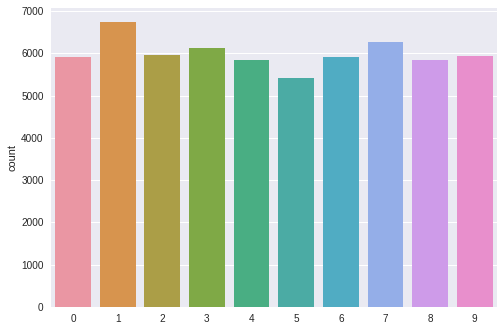

In [2]:
# Set dimension ordering convention 
K.set_image_dim_ordering('th')
seed = 5
numpy.random.seed(seed)

# load data from keras datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Training set description
sns.set(style="darkgrid")
sns.countplot(y_train)

In [0]:
# Reshape as (channel, width, height)
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

# Normalization 
X_train = X_train / 255
X_test = X_test / 255

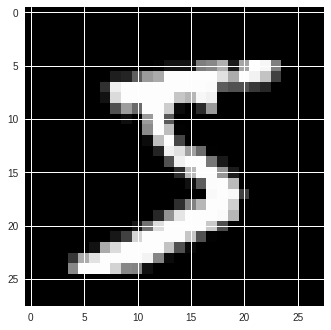

In [5]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

plt.imshow(X_train[0][0,:,:], cmap=plt.get_cmap('gray'))

In [0]:
model = Sequential()

model.add(Conv2D(30, (5, 5), input_shape=(1, 28, 28), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
# Fit the model 
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=300)

# Evaluate the model 
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

# Save the model
model.save('model.h5')


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 8s 135us/step - loss: 1.6313 - acc: 0.4251 - val_loss: 0.6562 - val_acc: 0.7991
Epoch 2/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.6255 - acc: 0.7989 - val_loss: 0.3960 - val_acc: 0.8791
Epoch 3/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.4428 - acc: 0.8602 - val_loss: 0.2862 - val_acc: 0.9124
Epoch 4/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.3497 - acc: 0.8896 - val_loss: 0.2225 - val_acc: 0.9337
Epoch 5/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2842 - acc: 0.9121 - val_loss: 0.1783 - val_acc: 0.9471
Epoch 6/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.2447 - acc: 0.9242 - val_loss: 0.1506 - val_acc: 0.9543
Epoch 7/100
60000/60000 [==============================] - 6s 99us/step - loss: 0.2162 - acc: 0.9319 - val_loss: 0.1322

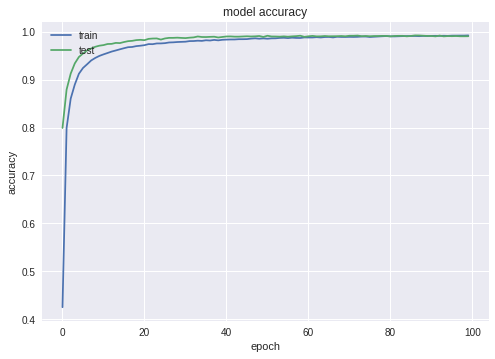

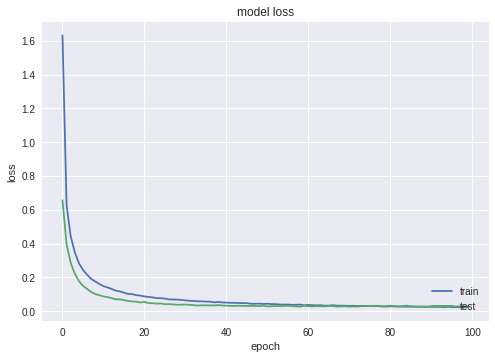

In [8]:

# Summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()